1.YELP: https://www.yelp.com/dataset/download

读取数据并进行预处理

In [1]:
import os
import pandas as pd
import json
for dirname, _, filenames in os.walk('yelp_dataset-2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

yelp_dataset-2\Dataset_User_Agreement.pdf
yelp_dataset-2\yelp_academic_dataset_business.json
yelp_dataset-2\yelp_academic_dataset_checkin.json
yelp_dataset-2\yelp_academic_dataset_review.json
yelp_dataset-2\yelp_academic_dataset_tip.json
yelp_dataset-2\yelp_academic_dataset_user.json


In [2]:
def load_rows(filepath, nrows = None):
    with open(filepath) as json_file:
        count = 0
        objs = []
        line = json_file.readline()
        while (nrows is None or count < nrows) and line:
            count += 1
            obj = json.loads(line)
            objs.append(obj)
            line = json_file.readline()
        return pd.DataFrame(objs)

In [3]:
review = load_rows('yelp_dataset-2/yelp_academic_dataset_review.json',10000)
review.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [4]:
business = load_rows('yelp_dataset-2/yelp_academic_dataset_business.json',10000)
business.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


预处理，查看是否有null值，若有，则删除null值

In [5]:
review.isna().any(axis=1).sum()

0

In [6]:
business.isna().any(axis=1).sum()

2105

In [7]:
business_new = business.drop(['business_id','name','hours','postal_code'],1).dropna()
business_new.head()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_20788\3772500510.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  business_new = business.drop(['business_id','name','hours','postal_code'],1).dropna()


,address,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,87 Grasso Plaza Shopping Center,Affton,MO,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,5255 E Broadway Blvd,Tucson,AZ,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,935 Race St,Philadelphia,PA,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,101 Walnut St,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"


频繁模式挖掘

In [8]:
business_new['stars'] = business_new['stars'].apply(lambda x: str(int(x //1 * 1)).split())
business_new['review_count_frequency'] = business_new['review_count'].apply(lambda x:'high_counts'.split() if x > 30 else 'low_counts'.split())
business_new['latitude'] = business_new['latitude'].apply(lambda x: str(int(x//5 *5)).split())
business_new['longitude'] = business_new['longitude'].apply(lambda x: str(int(x//5 *5)).split())
business_new['categories'] = business_new['categories'].apply(lambda x: x.split(', '))
business_new.head()

,address,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,review_count_frequency
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,[30],[-120],[5],7,0,{'ByAppointmentOnly': 'True'},"[Doctors, Traditional Chinese Medicine, Naturo...",[low_counts]
1,87 Grasso Plaza Shopping Center,Affton,MO,[35],[-95],[3],15,1,{'BusinessAcceptsCreditCards': 'True'},"[Shipping Centers, Local Services, Notaries, M...",[low_counts]
2,5255 E Broadway Blvd,Tucson,AZ,[30],[-115],[3],22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...",[low_counts]
3,935 Race St,Philadelphia,PA,[35],[-80],[4],80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...",[high_counts]
4,101 Walnut St,Green Lane,PA,[40],[-80],[4],13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","[Brewpubs, Breweries, Food]",[low_counts]


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transactions = list(business_new['stars'])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 使用apriori算法找频繁项集，设置最小支持度阈值为0.1
frequent_itemset = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemset

,support,itemsets
0,0.152845,(2)
1,0.295295,(3)
2,0.410175,(4)
3,0.105470,(5)


In [10]:
transactions_2 = list(business_new['categories'])
te_2 = TransactionEncoder()
te_ary_2 = te_2.fit(transactions_2).transform(transactions_2)
df_2 = pd.DataFrame(te_ary_2, columns=te_2.columns_)
frequent_itemset_2 = apriori(df_2, min_support=0.05, use_colnames=True)
frequent_itemset_2

,support,itemsets
0,0.058315,(Active Life)
1,0.057002,(American (Traditional))
2,0.063567,(Automotive)
3,0.079431,(Bars)
4,0.102516,(Beauty & Spas)
5,0.071991,(Event Planning & Services)
6,0.197593,(Food)
7,0.081182,(Health & Medical)
8,0.092232,(Home Services)
9,0.074836,(Local Services)


In [11]:
transactions_3 = list(business_new['latitude'])
te_3 = TransactionEncoder()
te_ary_3 = te_3.fit(transactions_3).transform(transactions_3)
df_3 = pd.DataFrame(te_ary_3, columns=te_3.columns_)
frequent_itemset_3 = apriori(df_3, min_support=0.1, use_colnames=True)
frequent_itemset_3

,support,itemsets
0,0.227899,(25)
1,0.115974,(30)
2,0.458643,(35)
3,0.159081,(40)


In [12]:
transactions_4 = list(business_new['longitude'])
te_4 = TransactionEncoder()
te_ary_4 = te_4.fit(transactions_4).transform(transactions_4)
df_4 = pd.DataFrame(te_ary_4, columns=te_4.columns_)
frequent_itemset_4 = apriori(df_4, min_support=0.1, use_colnames=True)
frequent_itemset_4

,support,itemsets
0,0.104486,(-115)
1,0.113457,(-120)
2,0.253392,(-80)
3,0.173414,(-85)
4,0.166630,(-90)
5,0.142779,(-95)


模式命名

In [13]:
# 关联分析
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemset_2, metric="confidence", min_threshold=0.01)
rules = rules[rules['lift'] > 10]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Nightlife),(Bars),0.088731,0.079431,0.079431,0.895191,11.270037,0.072383,8.783311,1.000000
3,(Bars),(Nightlife),0.079431,0.088731,0.079431,1.000000,11.270037,0.072383,inf,0.989898
14,"(Restaurants, Bars)",(Nightlife),0.057877,0.088731,0.057877,1.000000,11.270037,0.052742,inf,0.967251
15,"(Restaurants, Nightlife)",(Bars),0.060832,0.079431,0.057877,0.951439,11.978170,0.053046,18.956901,0.975879
18,(Bars),"(Restaurants, Nightlife)",0.079431,0.060832,0.057877,0.728650,11.978170,0.053046,3.461098,0.995596
19,(Nightlife),"(Restaurants, Bars)",0.088731,0.057877,0.057877,0.652281,11.270037,0.052742,2.709438,1.000000


根据上面的关联性分析结果，给出模式命名：
1.种类差异模式：由上表分析，类别中几乎不可能同时包含Bars与Nightlife，因此如果用户购买了种类包含Bars的产品，就尽量少推种类中包含Nightlife的产品了

可视化

In [14]:
new_data = business[['name', 'review_count']]
new_data = new_data.sort_values(by='review_count', ascending=False)
new_data

,name,review_count
4497,Luke,4554
9506,Peppermill Reno,2486
141,Santa Barbara Shellfish Company,2404
2380,Prep & Pastry,2126
5851,Surrey's Café & Juice Bar,2084
...,...,...
4816,Pressuremaxx,5
9249,Buccaneers Team Store,5
4829,National Heating & Air Conditioning,5
9252,Castleton HD Ultrasound,5


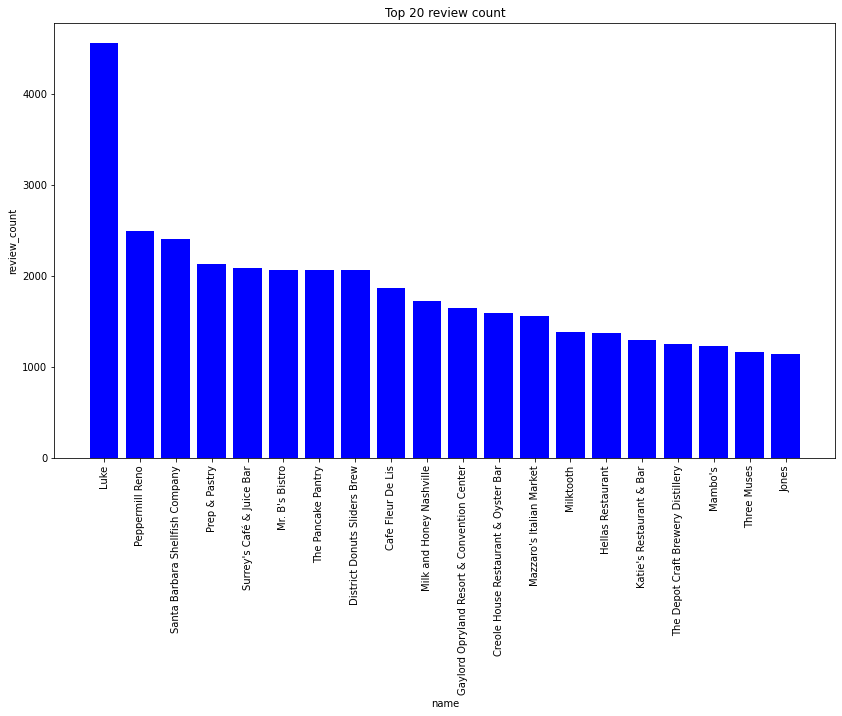

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.bar(new_data['name'].head(20), new_data['review_count'].head(20), color='blue')
plt.xlabel('name')
plt.ylabel('review_count')
plt.title('Top 20 review count')
plt.xticks(rotation=90)
plt.show()

2.Microsoft 资讯推荐:  https://learn.microsoft.com/zh-cn/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets

读取数据并进行预处理

In [16]:
import tempfile
import urllib
import zipfile
temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)
base_url = 'https://mind201910small.blob.core.windows.net/release'
validation_small_url = f'{base_url}/MINDsmall_dev.zip'

def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    """
    Download a URL to a temporary file
    """
    if not verbose:
        progress_updater = None
    # This is not intended to guarantee uniqueness, we just know it happens to guarantee
    # uniqueness for this application.
    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

zip_path = download_url(validation_small_url, verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

os.listdir(temp_dir)

Bypassing download of already-downloaded file MINDsmall_dev.zip


['behaviors.tsv',
 'entity_embedding.vec',
 'https_mind201910small.blob.core.windows.net_release_MINDsmall_dev.zip',
 'news.tsv',
 'relation_embedding.vec']

In [17]:
behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
behaviors = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])

In [18]:
behaviors

,impression_id,user_id,time,history,impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...


In [19]:
news_path = os.path.join(temp_dir, 'news.tsv')
news = pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
news

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
42411,N63550,lifestyle,lifestyleroyals,Why Kate & Meghan Were on Different Balconies ...,There's no scandal here. It's all about the or...,https://assets.msn.com/labs/mind/BBWyynu.html,"[{""Label"": ""Meghan, Duchess of Sussex"", ""Type""...",[]
42412,N30345,entertainment,entertainment-celebrity,See the stars at the 2019 Baby2Baby gala,Stars like Chrissy Teigen and Kate Hudson supp...,https://assets.msn.com/labs/mind/BBWyz7N.html,[],"[{""Label"": ""Kate Hudson"", ""Type"": ""P"", ""Wikida..."
42413,N30135,news,newsgoodnews,Tennessee judge holds lawyer's baby as he swea...,Tennessee Court of Appeals Judge Richard Dinki...,https://assets.msn.com/labs/mind/BBWyzI8.html,"[{""Label"": ""Tennessee"", ""Type"": ""G"", ""Wikidata...","[{""Label"": ""Tennessee Court of Appeals"", ""Type..."
42414,N44276,autos,autossports,Best Sports Car Deals for October,NaN,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[]


In [20]:
behaviors['time'] = pd.to_datetime(behaviors['time'])
behaviors

,impression_id,user_id,time,history,impressions
0,1,U80234,2019-11-15 12:37:50,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,2019-11-15 07:11:50,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,2019-11-15 09:55:12,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,2019-11-15 15:12:46,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,2019-11-15 08:25:46,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
...,...,...,...,...,...
73147,73148,U77536,2019-11-15 20:40:16,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148,73149,U56193,2019-11-15 13:11:26,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149,73150,U16799,2019-11-15 15:37:06,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150,73151,U8786,2019-11-15 08:29:26,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...


检查是否有null值，若有，将其去除

In [21]:
behaviors.isna().any(axis=1).sum()

2214

In [22]:
behaviors = behaviors.dropna()

In [23]:
behaviors['history'] = behaviors['history'].apply(lambda x: x.split(' '))
behaviors['impressions'] = behaviors['impressions'].apply(lambda x: x.split(' '))
behaviors = behaviors.head(10000)
behaviors

C:\Users\Superstar\AppData\Local\Temp\ipykernel_20788\2271076412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behaviors['history'] = behaviors['history'].apply(lambda x: x.split(' '))
C:\Users\Superstar\AppData\Local\Temp\ipykernel_20788\2271076412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behaviors['impressions'] = behaviors['impressions'].apply(lambda x: x.split(' '))


,impression_id,user_id,time,history,impressions
0,1,U80234,2019-11-15 12:37:50,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916..."
1,2,U60458,2019-11-15 07:11:50,"[N58715, N32109, N51180, N33438, N54827, N2848...","[N20036-0, N23513-1, N32536-0, N46976-0, N3521..."
2,3,U44190,2019-11-15 09:55:12,"[N56253, N1150, N55189, N16233, N61704, N51706...","[N36779-0, N62365-0, N58098-0, N5472-0, N13408..."
3,4,U87380,2019-11-15 15:12:46,"[N63554, N49153, N28678, N23232, N43369, N5851...","[N6950-0, N60215-0, N6074-0, N11930-0, N6916-0..."
4,5,U9444,2019-11-15 08:25:46,"[N51692, N18285, N26015, N22679, N55556]","[N5940-1, N23513-0, N49285-0, N23355-0, N19990..."
...,...,...,...,...,...
10280,10281,U82600,2019-11-15 11:43:32,"[N20609, N31557, N3909, N21383, N8391, N59303,...","[N31958-0, N49285-0, N5472-0, N34130-0, N29862..."
10281,10282,U33073,2019-11-15 10:34:25,"[N56253, N24724, N56586, N25415, N55808, N5518...","[N51470-0, N759-0, N31958-0, N6916-0, N5472-0,..."
10282,10283,U21980,2019-11-15 06:03:42,"[N11282, N52097, N1150, N11071, N62990, N64555...","[N17807-0, N36786-0, N29490-0, N32786-0, N1968..."
10283,10284,U50685,2019-11-15 11:27:28,"[N42612, N4643, N23571, N56253, N12384, N38118...","[N29862-0, N14223-0, N34130-0, N31958-1, N5523..."


频繁模式挖掘

In [24]:
transactions = list(behaviors['history'])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 使用apriori算法找频繁项集，设置最小支持度阈值为0.05
frequent_itemset = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemset

,support,itemsets
0,0.0426,(N10059)
1,0.0159,(N10078)
2,0.0101,(N10152)
3,0.0196,(N10235)
4,0.0153,(N10347)
...,...,...
1015,0.0100,"(N871, N60184)"
1016,0.0116,"(N61388, N871)"
1017,0.0127,"(N619, N871)"
1018,0.0107,"(N6233, N871)"


模式命名

In [28]:
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.001)
rules = rules[rules['lift'] > 10]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
762,(N47020),(N61864),0.0294,0.0238,0.0119,0.404762,17.006803,0.0112,1.640016,0.969709
763,(N61864),(N47020),0.0238,0.0294,0.0119,0.500000,17.006803,0.0112,1.941200,0.964147


根据上面的关联性分析结果，给出模式命名：
1.不推荐模式：由上表分析，如果观看了新闻N47020，就几乎不会看新闻N61864了，因此如果有用户观看了这两个新闻之一，就不给他推荐另外一个了。

可视化

In [30]:
from collections import Counter
new_data = [item for sublist in list(behaviors['history']) for item in sublist]
frequency = Counter(new_data)
frequency_df = pd.DataFrame(frequency.items(), columns=['id', 'frequency'])
frequency_df = frequency_df.sort_values(by='frequency', ascending=False)
frequency_df

,id,frequency
118,N42620,1448
611,N306,1368
44,N45794,1118
238,N31801,1021
440,N871,996
...,...,...
14968,N7986,1
14964,N24232,1
14962,N18648,1
14961,N38016,1


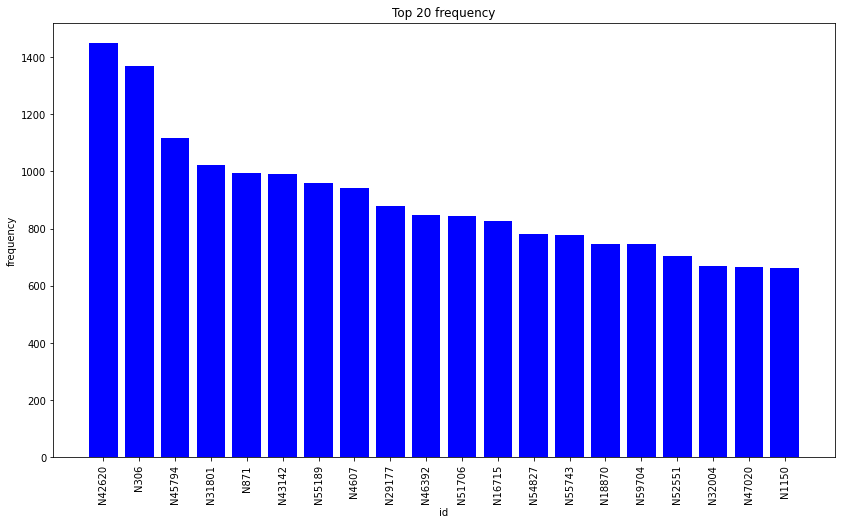

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.bar(frequency_df['id'].head(20), frequency_df['frequency'].head(20), color='blue')
plt.xlabel('id')
plt.ylabel('frequency')
plt.title('Top 20 frequency')
plt.xticks(rotation=90)
plt.show()